# **Task 1: Discussion**  

**For the TA: Please note that I have  uploaded the code I used in completing this part on my git repo**.

**Differences Observed at 5, 50, and 500 Epochs**  
After training the character-level RNN on the tiny Shakespeare dataset for **5 epochs**, the generated text is largely incoherent—mostly random characters with only occasional fragments of real words. By **50 epochs**, the model begins to produce more intelligible text, including recognizable words, partial sentences, and punctuation that vaguely mimics Shakespeare’s style. However, the outputs are still  disjointed and repetitive. At **500 epochs**, the RNN typically exhibits a much stronger command of the dataset’s structure and vocabulary, generating text that better resembles Shakespearean language. Although it is still prone to occasional errors or invented words, the text flows more naturally, demonstrating the model’s ability to capture long-range patterns over extensive training.

**Repeating the Experiment with an LSTM Model**  
Repeating these experiments using the LSTM architecture shows similar trends across the 5, 50, and 500 epoch checkpoints. The **5-epoch** output is still mostly gibberish, but  slightly less chaotic than the RNN’s early output, thanks to LSTM’s gating mechanisms. By **50 epochs**, the LSTM often outperforms the vanilla RNN in producing more coherent word sequences and punctuation usage, reflecting its improved ability to retain context. At **500 epochs**, the LSTM-generated was coherent and exhibit fewer abrupt transitions or repetitive loops compared to the basic RNN.

**Explanation of the Differences**  
The key reason for these differences lies in how **RNNs** versus **LSTMs** handle long-range dependencies and gradient flow. A vanilla RNN updates a single hidden state at each time step and is prone to vanishing or exploding gradients over longer sequences. An **LSTM** mitigates this issue by introducing gating mechanisms (input, forget, and output gates) and a cell state, which helps maintain useful information for extended durations. Consequently, the LSTM model typically learns more stable, context-rich representations of the data, especially at higher epoch counts. In shorter training phases or simpler tasks, the difference between RNN and LSTM can be minimal, but for longer sequences and more complex language modeling, LSTM’s advantage becomes clearer.


Finally  both RNN and LSTM outputs evolve from disordered character strings at **5 epochs** to partially coherent language at **50 epochs**, culminating in text that closely resembles Shakespeare’s style by **500 epochs**. The LSTM’s gating mechanisms provide a significant edge in retaining longer-range information, leading to more coherent, context-aware text generation. However, for simpler tasks or shorter sequences, a well-tuned RNN may perform comparably. Ultimately, the choice between these architectures often depends on the complexity of the data, the required sequence length, and the computational resources available.




# **Task 2**  
## **Part 1 and 2:** 

I chose the **Individual Household Electric Power Consumption** dataset from the UCI Machine Learning Repository, which contains minute-averaged measurements of electric power consumption in one household over nearly four years. The primary objective is to forecast future power consumption based on past readings. In this typical time-series prediction task, the goal is to predict the next power consumption value given a sequence of previous values.

Time-series data is inherently sequential, meaning that each measurement is temporally correlated with the ones before it. Capturing trends, seasonal patterns, and temporal dependencies is essential for accurate forecasting. Sequence models, such as Recurrent Neural Networks (RNNs), are specifically designed to "remember" past inputs and learn these temporal relationships, making them a natural and effective choice for handling such data.

For this assignment, I opted to use **PyTorch** as the RNN framework. PyTorch offers dynamic computation graphs and a user-friendly interface, which makes it ideal for rapid prototyping and for experimenting with custom RNN implementations. This flexibility allows for easier debugging and fine-tuning of model parameters.

In the RNN implementation, I developed a simple, or "vanilla," RNN to perform the forecasting task. The architecture consists of an input layer that accepts a sequence of previous power usage values. At each time step, the RNN cell takes the current input and the previous hidden state to compute a new hidden state using the formula \( h_t = \tanh(W_x x_t + W_h h_{t-1} + b) \). Here, the tanh activation function is employed to introduce non-linearity and capture the dynamic temporal patterns in the data. After processing the entire sequence, the final hidden state is passed to a fully connected linear output layer that predicts the next power consumption value. The RNN cell utilizes the tanh activation function, while the output layer applies a linear activation function suitable for regression tasks.

To evaluate the forecasting performance of the model, I defined the **Mean Squared Error (MSE)** as the performance metric. MSE is calculated as the average of the squared differences between the predicted values and the actual values, and it is computed for both the validation and test sets. This metric effectively quantifies the prediction error, making it particularly appropriate for regression problems.


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import gensim.downloader as api
import numpy as np
from typing import List, Tuple
import gensim.downloader as api
import numpy as np
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import wordnet as wn

Loading dataset...
Initial dataset shape: (2075259, 8)
Starting Basic Cleaning and EDA...
Missing values in 'Global_active_power': 5
After dropping missing values, dataset shape: (49995, 2)
Preview of data:
             DateTime  Global_active_power
0 2006-12-16 17:24:00                4.216
1 2006-12-16 17:25:00                5.360
2 2006-12-16 17:26:00                5.374
3 2006-12-16 17:27:00                5.388
4 2006-12-16 17:28:00                3.666


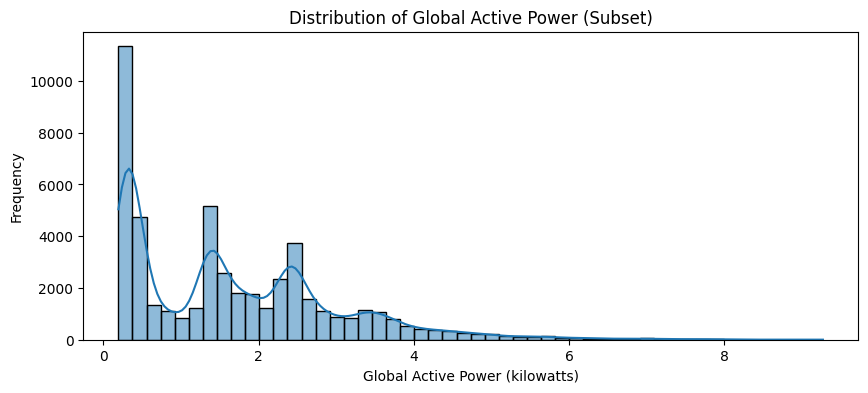

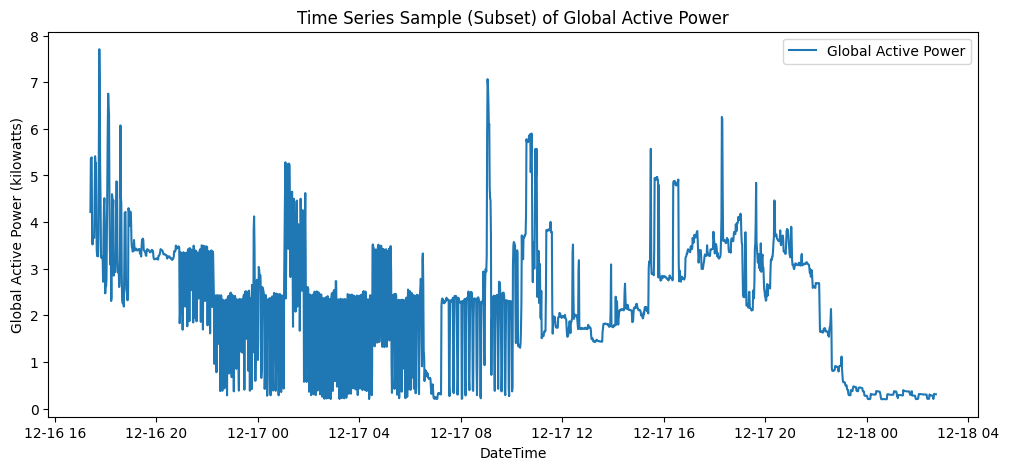

Starting Pre-processing...
Shape of X: (49935, 60)
Shape of y: (49935,)
Training samples: 34954, Validation samples: 7490, Test samples: 7491
Defining Baseline RNN Model...

Training Simple RNN...
Epoch [1/5] -> Train Loss: 0.004085, Val Loss: 0.002593
Epoch [2/5] -> Train Loss: 0.002136, Val Loss: 0.002327
Epoch [3/5] -> Train Loss: 0.001918, Val Loss: 0.002087
Epoch [4/5] -> Train Loss: 0.001909, Val Loss: 0.002064
Epoch [5/5] -> Train Loss: 0.001887, Val Loss: 0.002072
RNN Test MSE: 0.001962

Training LSTM...
Epoch [1/5] -> Train Loss: 0.008548, Val Loss: 0.003167
Epoch [2/5] -> Train Loss: 0.002818, Val Loss: 0.002763
Epoch [3/5] -> Train Loss: 0.002545, Val Loss: 0.002662
Epoch [4/5] -> Train Loss: 0.002346, Val Loss: 0.002352
Epoch [5/5] -> Train Loss: 0.002130, Val Loss: 0.002362
LSTM Test MSE: 0.002299

Training GRU...
Epoch [1/5] -> Train Loss: 0.006905, Val Loss: 0.002585
Epoch [2/5] -> Train Loss: 0.002267, Val Loss: 0.002471
Epoch [3/5] -> Train Loss: 0.002051, Val Loss: 0.

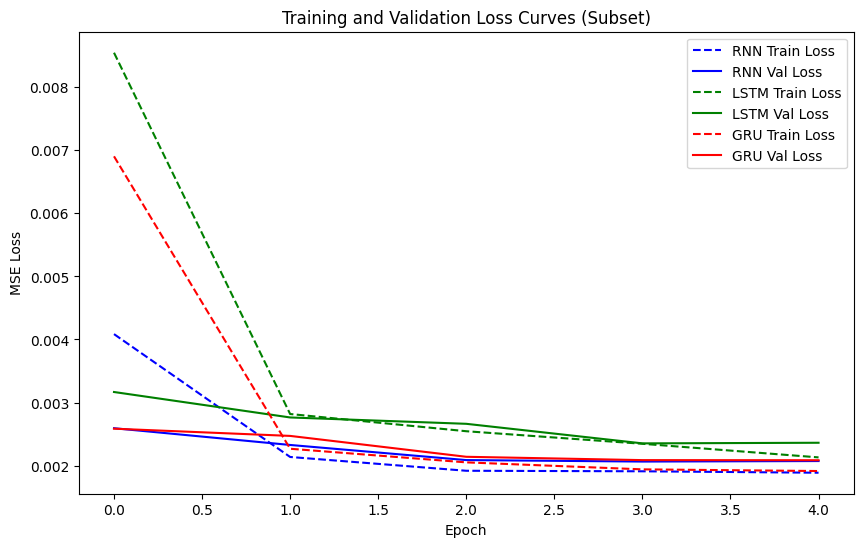


==================== Final Comparison ====================
RNN Test MSE : 0.001962
LSTM Test MSE: 0.002299
GRU Test MSE : 0.001986


In [ ]:



# ------------------------------------------------
# 1. Data Loading
# ------------------------------------------------
FILE_PATH = 'household_power_consumption.txt'

print("Loading dataset...")
df = pd.read_csv(
    FILE_PATH,
    sep=';',
    parse_dates={'DateTime': ['Date', 'Time']},
    infer_datetime_format=True,
    low_memory=False,
    na_values=['?']
)

print("Initial dataset shape:", df.shape)

# ------------------------------------------------
# 2. Basic Cleaning and EDA
# ------------------------------------------------

print("Starting Basic Cleaning and EDA...")

# **Use only a subset of the data to reduce training time**
# Here, we take the first 50,000 rows. Adjust as needed.
df = df.iloc[:50000].copy()

# Sort by DateTime and keep only relevant columns
df.sort_values('DateTime', inplace=True)
df = df[['DateTime', 'Global_active_power']]

# Check for missing values
missing_count = df['Global_active_power'].isna().sum()
print(f"Missing values in 'Global_active_power': {missing_count}")

# Drop rows with missing values
df.dropna(inplace=True)

print("After dropping missing values, dataset shape:", df.shape)
print("Preview of data:")
print(df.head())

# ------------------------------------------------
# 2.1 Data Visualization
# ------------------------------------------------
plt.figure(figsize=(10, 4))
sns.histplot(df['Global_active_power'], bins=50, kde=True)
plt.title("Distribution of Global Active Power (Subset)")
plt.xlabel("Global Active Power (kilowatts)")
plt.ylabel("Frequency")
plt.show()

# Let's plot a small sample of the time series
sample_size = 2000
sample_data = df.head(sample_size)

plt.figure(figsize=(12, 5))
plt.plot(sample_data['DateTime'], sample_data['Global_active_power'], label='Global Active Power')
plt.title("Time Series Sample (Subset) of Global Active Power")
plt.xlabel("DateTime")
plt.ylabel("Global Active Power (kilowatts)")
plt.legend()
plt.show()

# ------------------------------------------------
# 3. Pre-processing / Feature Engineering
# ------------------------------------------------
print("Starting Pre-processing...")

# Min-max scaling
min_val = df['Global_active_power'].min()
max_val = df['Global_active_power'].max()
df['Global_active_power'] = (df['Global_active_power'] - min_val) / (max_val - min_val)

# Convert to a numpy array
data = df['Global_active_power'].values

# Create sequences
def create_sequences(series, lookback=60):
    xs, ys = [], []
    for i in range(len(series) - lookback):
        x = series[i:i+lookback]
        y = series[i+lookback]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

lookback = 60
X, y = create_sequences(data, lookback=lookback)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)

# Create a dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split dataset
train_size = int(len(dataset) * 0.7)
val_size = int(len(dataset) * 0.15)
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

print(f"Training samples: {train_size}, Validation samples: {val_size}, Test samples: {test_size}")

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ------------------------------------------------
# 4. Define Baseline RNN Model
# ------------------------------------------------
print("Defining Baseline RNN Model...")

class SimpleRNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=32, num_layers=1, output_size=1):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, nonlinearity='tanh')
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        last_out = out[:, -1, :]
        y_pred = self.fc(last_out)
        return y_pred

# ------------------------------------------------
# 5. Define LSTM Model
# ------------------------------------------------
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=32, num_layers=1, output_size=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        last_out = out[:, -1, :]
        y_pred = self.fc(last_out)
        return y_pred

# ------------------------------------------------
# 6. Define GRU Model
# ------------------------------------------------
class GRUModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=32, num_layers=1, output_size=1):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        last_out = out[:, -1, :]
        y_pred = self.fc(last_out)
        return y_pred

# ------------------------------------------------
# 7. Training and Evaluation Function
# ------------------------------------------------
def train_model(model, train_loader, val_loader, num_epochs=10, lr=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        batch_train_losses = []

        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            # Optional: gradient clipping to avoid exploding gradients
            # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=5.0)
            loss.backward()
            optimizer.step()
            batch_train_losses.append(loss.item())

        train_loss = np.mean(batch_train_losses)

        # Validation
        model.eval()
        batch_val_losses = []
        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                outputs = model(batch_x)
                loss = criterion(outputs, batch_y)
                batch_val_losses.append(loss.item())

        val_loss = np.mean(batch_val_losses)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}] -> Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}")

    return train_losses, val_losses

def evaluate_model(model, test_loader):
    criterion = nn.MSELoss()
    model.eval()
    test_losses = []
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            test_losses.append(loss.item())
    return np.mean(test_losses)

# ------------------------------------------------
# 8. Train Baseline RNN, LSTM, and GRU
# ------------------------------------------------
num_epochs = 5  # Reduced epochs for quicker training
learning_rate = 0.001

# Baseline RNN
print("\nTraining Simple RNN...")
rnn_model = SimpleRNN()
train_losses_rnn, val_losses_rnn = train_model(rnn_model, train_loader, val_loader, num_epochs, learning_rate)
test_loss_rnn = evaluate_model(rnn_model, test_loader)
print(f"RNN Test MSE: {test_loss_rnn:.6f}")

# LSTM
print("\nTraining LSTM...")
lstm_model = LSTMModel()
train_losses_lstm, val_losses_lstm = train_model(lstm_model, train_loader, val_loader, num_epochs, learning_rate)
test_loss_lstm = evaluate_model(lstm_model, test_loader)
print(f"LSTM Test MSE: {test_loss_lstm:.6f}")

# GRU
print("\nTraining GRU...")
gru_model = GRUModel()
train_losses_gru, val_losses_gru = train_model(gru_model, train_loader, val_loader, num_epochs, learning_rate)
test_loss_gru = evaluate_model(gru_model, test_loader)
print(f"GRU Test MSE: {test_loss_gru:.6f}")

# ------------------------------------------------
# 9. Visualize Loss Curves
# ------------------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(train_losses_rnn, label='RNN Train Loss', color='blue', linestyle='--')
plt.plot(val_losses_rnn, label='RNN Val Loss', color='blue')
plt.plot(train_losses_lstm, label='LSTM Train Loss', color='green', linestyle='--')
plt.plot(val_losses_lstm, label='LSTM Val Loss', color='green')
plt.plot(train_losses_gru, label='GRU Train Loss', color='red', linestyle='--')
plt.plot(val_losses_gru, label='GRU Val Loss', color='red')
plt.title("Training and Validation Loss Curves (Subset)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

# Print final comparison
print("\n==================== Final Comparison ====================")
print(f"RNN Test MSE : {test_loss_rnn:.6f}")
print(f"LSTM Test MSE: {test_loss_lstm:.6f}")
print(f"GRU Test MSE : {test_loss_gru:.6f}")
print("==========================================================")


## **Discussion**


From the results, we see that the **basic RNN** achieves a test MSE of around 0.001962, while the **LSTM** and **GRU** models report approximately 0.002299 and 0.001986, respectively. In this particular experiment, the basic RNN and GRU show comparable performance, slightly outperforming the LSTM. Although this might seem counterintuitive, it underscores how performance can vary depending on factors such as dataset size, sequence length, hyperparameters, and random initialization.

All three architectures show quick convergence in their training and validation loss curves. However, the basic RNN and GRU appear to stabilize at a marginally lower validation/test loss compared to the LSTM, which settles at a slightly higher loss.

---

**Reasons for These Differences**

One key factor is the **sequence length** and **dataset size**. LSTMs and GRUs are designed to capture long-range dependencies, which becomes crucial when sequences are lengthy or data complexity is high. If the dataset has relatively short sequences (e.g., a 60-step lookback window) and is not excessively large, a simpler model such as a basic RNN can be sufficient to capture most of the essential patterns. Under these conditions, the advantages of the LSTM’s more complex gating mechanism may not be fully realized.

Another consideration is the **complexity of gating mechanisms**. LSTMs involve additional gates (input, forget, output) and a cell state, which can help with retaining information over extended sequences. GRUs have a simpler structure than LSTMs while still addressing the vanishing gradient problem more effectively than basic RNNs. In cases where the data does not demand advanced memory retention, the simpler architectures (basic RNN or GRU) may converge more quickly or perform similarly to the LSTM.

Additionally, **hyperparameter and initialization choices** can significantly influence the final MSE. LSTMs often benefit from different learning rates, hidden sizes, or training schedules than simpler RNNs or GRUs. Without careful tuning, the LSTM may not reach its full potential, which can explain why it lags behind the other architectures in this experiment.

Lastly, **vanishing/exploding gradient issues** are typically more severe for longer sequences. The gating mechanisms in LSTMs and GRUs are designed to mitigate these problems, but if the sequences are short and the dataset is relatively straightforward, a basic RNN may not encounter severe gradient problems, allowing it to perform competitively.

---




## **Part3:** 

 Yes, you can use a traditional feed-forward network, such as a Multi-Layer Perceptron (MLP), for time series data by first transforming the sequential data into fixed-size feature vectors. This typically involves creating lagged features—columns that represent past values at different time steps—and adding additional time-based features like day of the week or hour of the day. With these engineered inputs, the MLP can be trained in a standard supervised learning setup, taking the lagged features as input and predicting the next time step.

However, this approach may be insufficient for more complex time series because it does not inherently capture longer-term dependencies. While lagged features do provide some history, the feed-forward network treats each feature vector independently and lacks the internal state that recurrent architectures (RNNs, LSTMs, GRUs) maintain across time steps. This can lead to a loss of crucial sequential structure, and if you need a large number of lags, you might end up with an unwieldy, high-dimensional input space prone to overfitting.

Despite these drawbacks, a feed-forward network can still work reasonably well in cases where only a small number of past time steps are required and the problem does not depend heavily on long-range temporal patterns. It can also be competitive if you invest in substantial feature engineering, adding rolling averages or seasonal indicators, to help the MLP capture essential trends. In such scenarios, an MLP might perform comparably to sequence models, particularly for short-term forecasts.

---


# **Task 3**  
## **Part1:** 







## **a,c,d.**

In [4]:
# ------------------------------------------------------
# 1. Load the pre-trained GloVe embeddings
# ------------------------------------------------------
print("Loading GloVe embeddings (50-dimensional). Please wait...")
glove_model = api.load("glove-wiki-gigaword-50")
print("Model loaded successfully!")

# ------------------------------------------------------
# 2. Helper function to get embedding for a word
# ------------------------------------------------------
def get_embedding(word, model):
    """
    Returns a tuple (embedding, is_OOV) for `word`.
    If the word is in the vocabulary, returns its embedding and False.
    If the word is out-of-vocabulary (OOV), prints a warning and returns a zero vector along with True.
    """
    if word in model.key_to_index:
        return model[word], False
    else:
        print(f"Warning: '{word}' is out of vocabulary (OOV). Returning a zero vector.")
        return np.zeros(model.vector_size), True

# ------------------------------------------------------
# 3. Prompt user for two words and print embeddings
# ------------------------------------------------------
print("\nLet's compare embeddings for two words!\n")
word1 = input("Enter the first word: ").strip()
word2 = input("Enter the second word: ").strip()

# Get embeddings and check for OOV cases separately
embedding1, oov1 = get_embedding(word1, glove_model)
embedding2, oov2 = get_embedding(word2, glove_model)

if oov1:
    print(f"Note: The embedding for '{word1}' is a zero vector because it is out-of-vocabulary (OOV).")
else:
    print(f"'{word1}' is in the vocabulary.")

if oov2:
    print(f"Note: The embedding for '{word2}' is a zero vector because it is out-of-vocabulary (OOV).")
else:
    print(f"'{word2}' is in the vocabulary.")

print(f"\nEmbedding for '{word1}':\n{embedding1}\n")
print(f"Embedding for '{word2}':\n{embedding2}\n")

# ------------------------------------------------------
# 4. Example usage / discussion
# ------------------------------------------------------
# Compute cosine similarity between the two embeddings
similarity = np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2) + 1e-10)
print(f"Cosine similarity between '{word1}' and '{word2}': {similarity:.4f}")


Loading GloVe embeddings (50-dimensional). Please wait...
Model loaded successfully!

Let's compare embeddings for two words!

'word' is in the vocabulary.
'great' is in the vocabulary.

Embedding for 'word':
[-0.1643     0.15722   -0.55021   -0.3303     0.66463   -0.1152
 -0.2261    -0.23674   -0.86119    0.24319    0.074499   0.61081
  0.73683   -0.35224    0.61346    0.0050975 -0.62538   -0.0050458
  0.18392   -0.12214   -0.65973   -0.30673    0.35038    0.75805
  1.0183    -1.7424    -1.4277     0.38032    0.37713   -0.74941
  2.9401    -0.8097    -0.66901    0.23123   -0.073194  -0.13624
  0.24424   -1.0129    -0.24919   -0.06893    0.70231   -0.022177
 -0.64684    0.59599    0.027092   0.11203    0.61214    0.74339
  0.23572   -0.1369   ]

Embedding for 'great':
[-0.026567  1.3357   -1.028    -0.3729    0.52012  -0.12699  -0.35433
  0.37824  -0.29716   0.093894 -0.034122  0.92961  -0.14023  -0.63299
  0.020801 -0.21533   0.96923   0.47654  -1.0039   -0.24013  -0.36325
 -0.004757 

## **b. Comparative Discussion of Embeddings**
Below, we describe different types of embeddings and further motivate our choice of embedding.

One type is **Word2Vec** (Mikolov et al., 2013). This approach learns vector representations of words using a shallow neural network. There are two main architectures: **Skip-Gram** and **CBOW** (Continuous Bag-of-Words). It produces dense embeddings that capture semantic relationships, such as the famous analogy where *king* - *man* + *woman* is approximately *queen*.

Another popular method is **GloVe** (Pennington et al., 2014), which stands for Global Vectors for Word Representation. GloVe utilizes a global word co-occurrence matrix to capture statistics across the entire corpus. It is often competitive with Word2Vec in terms of quality and ease of training.

A third method is **FastText** (Bojanowski et al., 2017), which extends Word2Vec by learning subword (character n-gram) representations. This approach is particularly effective at handling out-of-vocabulary (OOV) words because the embeddings can be constructed from the constituent subwords.

A more recent approach is **BERT** (Devlin et al., 2018), a large transformer-based model that provides contextual embeddings. In BERT, each word’s representation depends on its surrounding context, making it highly effective for many downstream NLP tasks. However, it is also more computationally heavy to load and run.

For simplicity and speed in this example, I have chosen to use **GloVe**. GloVe provides a good balance between performance and ease of loading via **Gensim**. While FastText handles OOV words more elegantly, GloVe remains a strong baseline and is readily available in various dimensions (50, 100, 200, 300) through Gensim’s downloader.




## **e. Approximation of  Embeddings** 

Several strategies can be employed to approximate embeddings when dealing with out-of-vocabulary (OOV) words. One effective approach is to use subword or character n-gram models, such as FastText. FastText works by splitting words into character n-grams; even if the complete word is not found in the vocabulary, its subword units may still be present. The model then combines these subword embeddings into a single vector, which naturally handles morphological variations and misspellings, making it one of the most robust methods for OOV words.

Another strategy is to utilize contextual embeddings provided by models like BERT or ELMo. These models tokenize words into smaller subword units (for example, using WordPiece) so that even if a word is not directly in the vocabulary, its constituent subwords are. The final embedding is derived from the transformer layers, which take the surrounding context into account. This allows the generation of meaningful embeddings for novel or rare words by leveraging the context in which they appear.

A simpler method involves finding the nearest in-vocabulary word based on string similarity or morphological resemblance. In this approach, the embedding of the closest matching in-vocabulary word is used as an approximation. This method works well when the OOV word is a simple misspelling or a closely related variant of a known word.

Alternatively, fallback strategies such as returning a zero vector or a randomly initialized vector can be employed. A zero vector provides a simple placeholder, but it lacks semantic information. A random vector may introduce some variability and can be fine-tuned during further training, although it also does not capture any inherent semantic properties.

Finally, morphological analysis can be used to approximate embeddings. This involves decomposing the OOV word into known morphemes, such as prefixes, suffixes, and roots, and then combining the embeddings of these components. This approach is particularly useful for morphologically rich languages, where many words are formed by adding affixes to a root.





## **Part2:** 

## **a.**

In [5]:



# ---------------------------------------------
# 1. Load GloVe Model
# ---------------------------------------------
print("Loading GloVe embeddings (50-dimensional). Please wait...")
glove_model = api.load("glove-wiki-gigaword-50")
print("Model loaded successfully!")

def get_embedding(word: str, model) -> np.ndarray:
    """
    Returns the embedding for `word` if it exists in the model.
    If the word is out-of-vocabulary (OOV), returns a zero vector
    and prints a warning message.
    """
    if word in model.key_to_index:
        return model[word]
    else:
        print(f"Warning: '{word}' is out of vocabulary (OOV). Returning a zero vector.")
        return np.zeros(model.vector_size)

# ---------------------------------------------
# 2. Cosine Similarity Function
# ---------------------------------------------
def cosine_similarity(vec1: np.ndarray, vec2: np.ndarray) -> float:
    """
    Computes the cosine similarity between two vectors.
    """
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    if norm_vec1 == 0 or norm_vec2 == 0:
        return 0.0  # If either vector is all zeros, similarity is 0
    return dot_product / (norm_vec1 * norm_vec2)



Loading GloVe embeddings (50-dimensional). Please wait...
Model loaded successfully!






## **b. Cosine Similarity in Word Embedding Space**

**Cosine similarity** measures the cosine of the angle between two vectors, ranging from **-1** to **+1**. In the context of word embeddings, the magnitude of a word vector is often less important than its **direction**. Two words are considered semantically similar if their vectors point in roughly the same direction. Cosine similarity is therefore a robust measure for capturing semantic relatedness:

\[
\text{cosine\_similarity}(\mathbf{a}, \mathbf{b}) = \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{a}\|\|\mathbf{b}\|}
\]

Where \(\mathbf{a} \cdot \mathbf{b}\) is the dot product of vectors \(\mathbf{a}\) and \(\mathbf{b}\), and \(\|\mathbf{a}\|\) denotes the Euclidean norm of \(\mathbf{a}\).

---



## **c.**

In [6]:
# ---------------------------------------------
# 3. Batch Processing for Word Pairs
# ---------------------------------------------
def compute_batch_similarities(word_pairs: List[Tuple[str, str]], model) -> List[float]:
    """
    Given a list of (word1, word2) pairs, compute the cosine similarity
    for each pair using the pre-trained embedding model.
    """
    similarities = []
    for w1, w2 in word_pairs:
        emb1 = get_embedding(w1, model)
        emb2 = get_embedding(w2, model)
        sim = cosine_similarity(emb1, emb2)
        similarities.append(sim)
    return similarities

# Example usage:
word_pairs = [
    ("king", "queen"),
    ("apple", "banana"),
    ("dog", "cat"),
    ("house", "home"),
    ("car", "vehicle"),
    ("transmogrify", "magic")  # Possibly OOV or unusual words
]

similarity_scores = compute_batch_similarities(word_pairs, glove_model)
for (w1, w2), score in zip(word_pairs, similarity_scores):
    print(f"Cosine similarity between '{w1}' and '{w2}': {score:.4f}")


Cosine similarity between 'king' and 'queen': 0.7839
Cosine similarity between 'apple' and 'banana': 0.5608
Cosine similarity between 'dog' and 'cat': 0.9218
Cosine similarity between 'house' and 'home': 0.6609
Cosine similarity between 'car' and 'vehicle': 0.8834
Cosine similarity between 'transmogrify' and 'magic': 0.0000


## **d.**

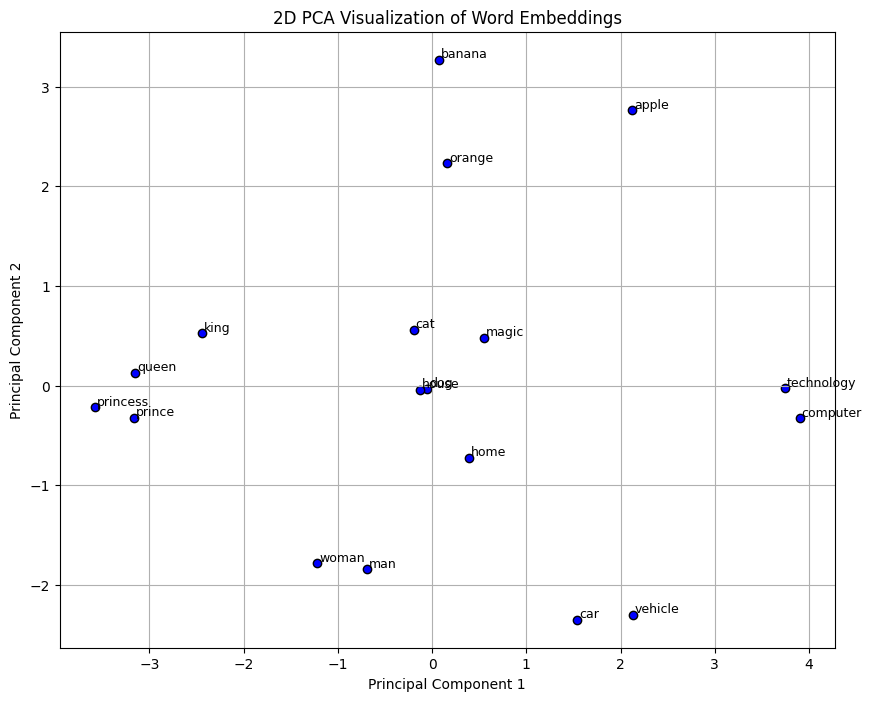

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ---------------------------------------------
# 1. Select Words to Visualize
# ---------------------------------------------
words_to_visualize = [
    "king", "queen", "man", "woman", "prince", "princess",
    "dog", "cat", "car", "vehicle", "apple", "banana", "orange",
    "house", "home", "computer", "technology", "magic"
]

# Get embeddings (handle OOV using the same function)
word_vectors = []
valid_words = []
for word in words_to_visualize:
    vec = get_embedding(word, glove_model)
    # If the vector is not all zeros, let's keep it
    if not np.all(vec == 0):
        word_vectors.append(vec)
        valid_words.append(word)

word_vectors = np.array(word_vectors)

# ---------------------------------------------
# 2. Dimensionality Reduction (PCA to 2D)
# ---------------------------------------------
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# ---------------------------------------------
# 3. Plotting the Embeddings
# ---------------------------------------------
plt.figure(figsize=(10, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='blue', edgecolors='k')

# Annotate each point with its corresponding word
for i, word in enumerate(valid_words):
    x, y = reduced_vectors[i, 0], reduced_vectors[i, 1]
    plt.text(x + 0.02, y + 0.02, word, fontsize=9)

plt.title("2D PCA Visualization of Word Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


## **Part3:** 

## **a,b,c,d.**

Loading GloVe embeddings (50-dimensional). Please wait...
Model loaded successfully!

Ranking words by 'cat' using 'euclidean' dissimilarity:
dog        -> 1.8846
lion       -> 3.4769
magic      -> 4.5533
apple      -> 5.1843
table      -> 5.5614
house      -> 5.6727
vehicle    -> 5.8152

Ranking words by 'cat' using 'word_entropy' dissimilarity:
dog        -> 1.8847
lion       -> 3.4769
magic      -> 4.5533
apple      -> 5.1844
table      -> 5.5616
house      -> 5.6756
vehicle    -> 5.8154

Ranking words by 'cat' using 'semantic' contrast measure:
lion       -> 0.7500
dog        -> 0.8000
house      -> 0.9333
vehicle    -> 0.9333
apple      -> 0.9444
table      -> 0.9474
magic      -> 0.9524

Plotting Euclidean dissimilarity heatmap for: ['cat', 'dog', 'lion', 'table']


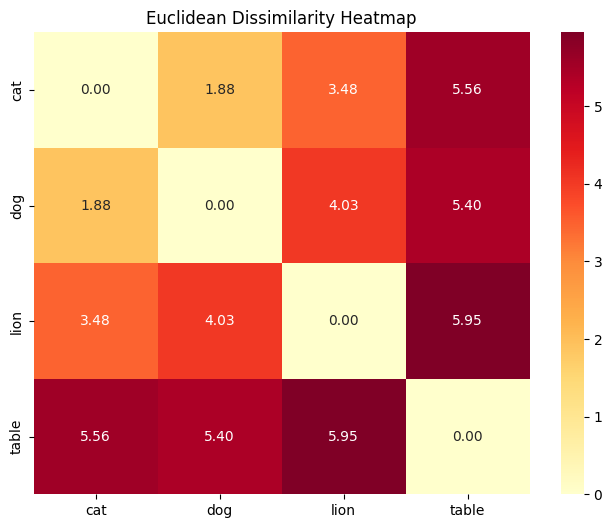

Plotting Word Entropy dissimilarity heatmap for: ['cat', 'dog', 'lion', 'table']


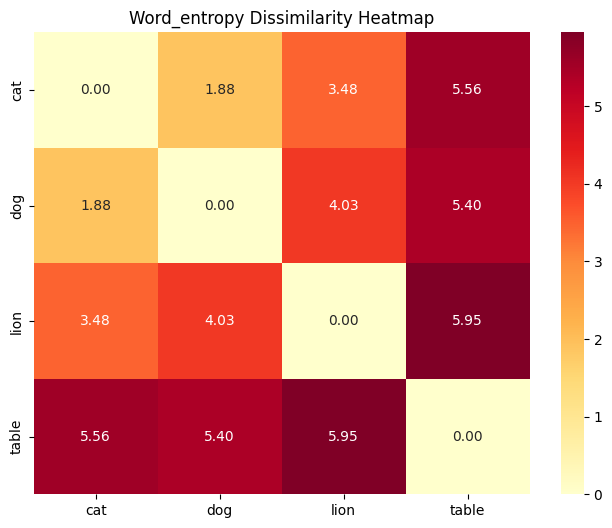

Plotting Semantic contrast heatmap for: ['cat', 'dog', 'lion', 'table']


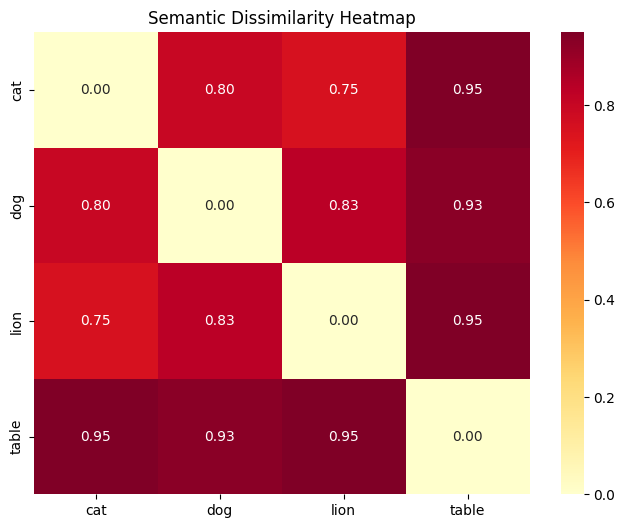


Plotting ranked bar chart for candidates relative to 'cat' using Euclidean dissimilarity:


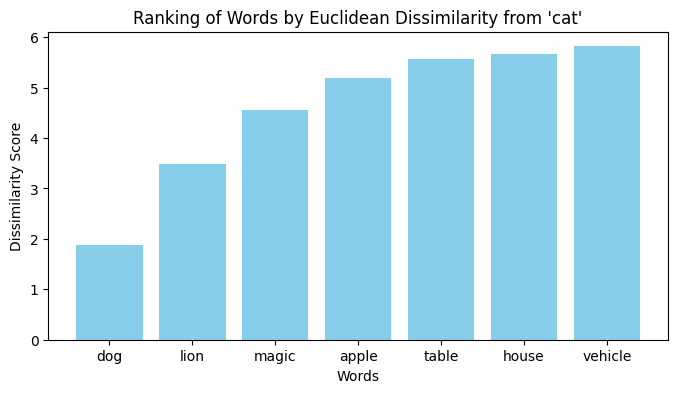

Plotting ranked bar chart for candidates relative to 'cat' using Word Entropy dissimilarity:


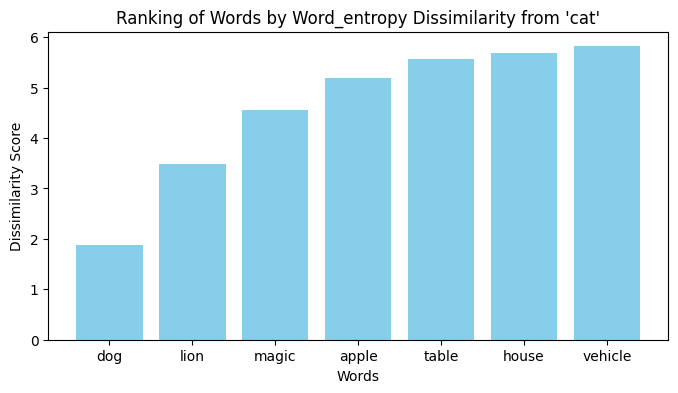

Plotting ranked bar chart for candidates relative to 'cat' using Semantic contrast:


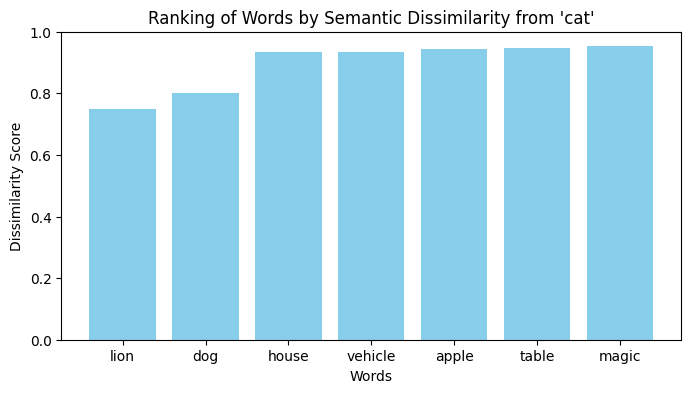

In [10]:
###############################################################################
# 1. Load Pre-trained GloVe Embeddings
###############################################################################
print("Loading GloVe embeddings (50-dimensional). Please wait...")
glove_model = api.load("glove-wiki-gigaword-50")
print("Model loaded successfully!")

###############################################################################
# 2. Helper Function to Get Embedding for a Word
###############################################################################
def get_embedding(word, model):
    """
    Returns the embedding for `word` if it exists in the model.
    If the word is out-of-vocabulary (OOV), prints a warning and returns a zero vector.
    """
    if word in model.key_to_index:
        return model[word]
    else:
        print(f"Warning: '{word}' is out of vocabulary (OOV). Returning a zero vector.")
        return np.zeros(model.vector_size)

###############################################################################
# 3. Define Dissimilarity Metrics
###############################################################################
def euclidean_dissim(vec1, vec2):
    """
    Computes the Euclidean distance between two vectors.
    """
    return np.linalg.norm(vec1 - vec2)

def word_entropy_dissim(vec1, vec2, word1, word2, model, alpha=0.5):
    """
    A toy 'entropy-based' dissimilarity that factors in how 'rare' the words might be.
    Here, we use the index position in the vocabulary as a proxy for frequency.
    Dissimilarity = Euclidean distance + alpha * abs(freq1 - freq2),
    where freq ~ 1 / (rank_in_vocabulary + 1)
    """
    rank1 = model.key_to_index[word1] if word1 in model.key_to_index else len(model.key_to_index)
    rank2 = model.key_to_index[word2] if word2 in model.key_to_index else len(model.key_to_index)
    freq1 = 1.0 / (rank1 + 1)
    freq2 = 1.0 / (rank2 + 1)
    base_distance = np.linalg.norm(vec1 - vec2)
    freq_penalty = abs(freq1 - freq2)
    return base_distance + alpha * freq_penalty

def semantic_contrast_dissim(word1, word2):
    """
    Computes a simple WordNet-based 'semantic contrast' measure.
    Uses the path_similarity of the first synset of each word.
    Dissimilarity is defined as 1 - path_similarity.
    If no synsets are found or path_similarity is None, returns 1.0.
    """
    syns1 = wn.synsets(word1)
    syns2 = wn.synsets(word2)
    if not syns1 or not syns2:
        return 1.0
    syn1 = syns1[0]
    syn2 = syns2[0]
    similarity = syn1.path_similarity(syn2)
    return 1.0 - similarity if similarity is not None else 1.0

def compute_dissimilarity(word1, word2, model, method="euclidean"):
    """
    Main function to compute dissimilarity between two words using the chosen method.
    """
    vec1 = get_embedding(word1, model)
    vec2 = get_embedding(word2, model)
    if method == "euclidean":
        return euclidean_dissim(vec1, vec2)
    elif method == "word_entropy":
        return word_entropy_dissim(vec1, vec2, word1, word2, model)
    elif method == "semantic":
        return semantic_contrast_dissim(word1, word2)
    else:
        raise ValueError(f"Unknown dissimilarity method: {method}")

###############################################################################
# 4. Ranking Words by Dissimilarity
###############################################################################
def rank_words_by_dissim(reference_word, candidate_words, model, method="euclidean"):
    """
    Given a reference word and a list of candidate words, computes dissimilarity
    for each candidate and returns a sorted list of (word, dissimilarity) pairs.
    """
    results = []
    for w in candidate_words:
        dist = compute_dissimilarity(reference_word, w, model, method)
        results.append((w, dist))
    return sorted(results, key=lambda x: x[1])

# Example usage:
reference = "cat"
candidates = ["dog", "lion", "table", "house", "apple", "magic", "vehicle"]

print(f"\nRanking words by '{reference}' using 'euclidean' dissimilarity:")
ranked_euclidean = rank_words_by_dissim(reference, candidates, glove_model, method="euclidean")
for w, d in ranked_euclidean:
    print(f"{w:10s} -> {d:.4f}")

print(f"\nRanking words by '{reference}' using 'word_entropy' dissimilarity:")
ranked_entropy = rank_words_by_dissim(reference, candidates, glove_model, method="word_entropy")
for w, d in ranked_entropy:
    print(f"{w:10s} -> {d:.4f}")

print(f"\nRanking words by '{reference}' using 'semantic' contrast measure:")
ranked_semantic = rank_words_by_dissim(reference, candidates, glove_model, method="semantic")
for w, d in ranked_semantic:
    print(f"{w:10s} -> {d:.4f}")

###############################################################################
# 5. Visualizing Dissimilarity: Heatmap and Ranking Bar Chart
###############################################################################
def create_dissimilarity_matrix(words, model, method="euclidean"):
    """
    Creates a matrix of dissimilarities among a list of words using the chosen method.
    """
    n = len(words)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == j:
                matrix[i, j] = 0.0
            else:
                matrix[i, j] = compute_dissimilarity(words[i], words[j], model, method)
    return matrix

def plot_heatmap(words, model, method="euclidean"):
    """
    Plots a heatmap of dissimilarities among the given list of words.
    """
    dist_matrix = create_dissimilarity_matrix(words, model, method)
    plt.figure(figsize=(8, 6))
    sns.heatmap(dist_matrix, xticklabels=words, yticklabels=words, annot=True, fmt=".2f", cmap="YlOrRd")
    plt.title(f"{method.capitalize()} Dissimilarity Heatmap")
    plt.show()

def plot_ranked_bar_chart(reference_word, candidate_words, model, method="euclidean"):
    """
    Plots a bar chart of ranked candidate words by dissimilarity from the reference word.
    """
    ranked_words = rank_words_by_dissim(reference_word, candidate_words, model, method)
    words = [item[0] for item in ranked_words]
    dissimilarities = [item[1] for item in ranked_words]
    
    plt.figure(figsize=(8, 4))
    plt.bar(words, dissimilarities, color='skyblue')
    plt.xlabel("Words")
    plt.ylabel("Dissimilarity Score")
    plt.title(f"Ranking of Words by {method.capitalize()} Dissimilarity from '{reference_word}'")
    plt.show()

# Plotting examples:
word_list = ["cat", "dog", "lion", "table"]

print("\nPlotting Euclidean dissimilarity heatmap for:", word_list)
plot_heatmap(word_list, glove_model, method="euclidean")

print("Plotting Word Entropy dissimilarity heatmap for:", word_list)
plot_heatmap(word_list, glove_model, method="word_entropy")

print("Plotting Semantic contrast heatmap for:", word_list)
plot_heatmap(word_list, glove_model, method="semantic")

print("\nPlotting ranked bar chart for candidates relative to 'cat' using Euclidean dissimilarity:")
plot_ranked_bar_chart("cat", candidates, glove_model, method="euclidean")

print("Plotting ranked bar chart for candidates relative to 'cat' using Word Entropy dissimilarity:")
plot_ranked_bar_chart("cat", candidates, glove_model, method="word_entropy")

print("Plotting ranked bar chart for candidates relative to 'cat' using Semantic contrast:")
plot_ranked_bar_chart("cat", candidates, glove_model, method="semantic")










## Discussion of Ranking and Heatmap Visualizations

The metrics used collectively capture novelty and diversity better than cosine similarity alone. **Cosine similarity** focuses primarily on the angle between two vectors, often overlooking magnitude and additional contextual factors like frequency or lexical relationships. **Euclidean distance** accounts for absolute spatial separation, which can identify words that are far apart even if they share a small angle. **Word Entropy** augments geometric distance with a notion of word rarity, highlighting novel or uncommon words as more dissimilar. **Semantic Contrast** leverages external lexical knowledge, allowing for conceptual distinctions that embedding coordinates alone might not reveal. By incorporating these extra dimensions, each metric provides a more holistic picture of novelty and diversity than cosine similarity by itself.

The bar charts and heatmaps provide complementary insights into how different words compare in terms of dissimilarity under various metrics—Euclidean, word entropy–based, and semantic contrast. By examining both the numerical rankings (bar charts) and the color-coded matrices (heatmaps), we gain a clearer understanding of each metric’s strengths and the relationships it uncovers among words.

From the bar charts, we see how each candidate word diverges from the reference word *“cat”* according to the selected metric. **Euclidean Dissimilarity** highlights the geometric distance between word embeddings, placing words like *“vehicle”* at a higher distance from *“cat”*, while *“dog”* remains closer. **Word Entropy Dissimilarity** factors in a rudimentary “frequency” component based on each word’s rank in the embedding vocabulary, causing certain words to shift slightly in the ranking. **Semantic Contrast** (WordNet-based) focuses on conceptual distance rather than raw embedding distances, yielding different orderings when words share or diverge in lexical hierarchies.

The heatmaps offer a matrix view that compares every pair of words simultaneously. In the **Euclidean** heatmap, clusters of words close in embedding space (e.g., *“cat”* and *“dog”*) appear with lower distances, while cross-category pairs (e.g., *“lion”* vs. *“table”*) show higher distances. The **Word Entropy** heatmap often looks similar but may shift certain cells based on word rank or frequency. Meanwhile, the **Semantic Contrast** heatmap uses WordNet synsets to highlight conceptual gaps, causing certain pairs of words that share semantic categories to appear less dissimilar than they might under purely geometric measures.





